# Project: Wrangling and Analyze Data

Importons les ibrairies à utiliser

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


response

<Response [200]>

In [5]:
open('image-predictions.tsv', 'wb').write(response.content)

335079

In [6]:
df_ImagePredict = pd.read_csv('image-predictions.tsv',sep='\t') 
df_ImagePredict.head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True


### Opening the j_son file

In [7]:
with open('tweet-json.txt') as f:
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

df_api.columns = ['tweet_id', 'favorites', 'retweets']
df_api.set_index('tweet_id', inplace = True)
df_api.head()


,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


- We've gathered all the three dataframes successfully.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### assessing Twitter archive data

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The twitter archive has 2356 lines and 17 columns
- There are unnecessary columns in this datasets
- timestamp has wrong type it shall be in datetime
- The dogs phases(Doggo, floofer, pupper, puppo) shall be in one column


In [9]:
#let's verify the timestamp type
df_archive['timestamp'].dtypes

dtype('O')

In [10]:
#Let's look at the summary statistic of our dataset
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- The rating denominator mean is >10. This implies that there rating denominator different of 10 in the data set

In [11]:
#let's evaluate the number of missing value in this dataset
df_archive.isnull().sum().sum()

11140

- There are 1140 Missing values in twitter archive data set

In [12]:
# checking dog's names
df_archive.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
Toby                7
an                  7
Daisy               7
Buddy               7
Oscar               6
Dave                6
Jack                6
Rusty               6
Bella               6
Leo                 6
Stanley             6
Scout               6
Koda                6
Milo                6
Jax                 6
Larry               5
Louis               5
Bentley             5
Sunny               5
very                5
Chester             5
Alfie               5
Phil                5
Finn                5
George              5
Oakley              5
Gus                 5
Sammy               5
Gary                4
Cassie              4
Beau                4
Maggie    

-  745 dogs don't have names
- There are wrong dog names like'a'

#### Do we have dogs with two different classification at once?

In [13]:
df_archive.query('doggo=="doggo" & floofer =="floofer" & pupper =="None" & puppo=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [14]:
# Checking dog without information on their stage
df_archive.query('doggo=="None" & floofer =="None" & pupper =="None" & puppo=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


There are 1976 dogs without information on their stage

### assessing Image prediction data

In [15]:
df_ImagePredict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- we observe that the entries in columns P1,P2,P3 are not uniform, some entries start with upper case and other with lower case.

In [16]:
df_ImagePredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- The dataset has 2075 lignes and 12 columns 

##### Which dog's image appear the most at the first prediction?

In [17]:
df_ImagePredict.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
Staffordshire_bullterrier          20
German_shepherd                    20
Cardigan                           19
web_site                           19
teddy                              18
Shetland_sheepdog                  18
Maltese_dog                        18
Eskimo_dog                         18
beagle                             18
Rottweiler                         17
Shih-Tzu    

In [18]:
df_ImagePredict.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [19]:
#let's check if there are duplicates images
df_ImagePredict.jpg_url.duplicated

<bound method Series.duplicated of 0         https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1         https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2         https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3         https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4         https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
5         https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7         https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8         https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9         https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
10        https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
11        https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
12        https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg
13        https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
14        https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg
15        https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
16        https://pbs.twimg.com/media

### Assessing the twitter image file

In [20]:
df_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


In [21]:
df_api.shape

(2354, 2)

In [22]:
# 
df_api.nunique()

favorites    2007
retweets     1724
dtype: int64

In [23]:
df_api.duplicated

<bound method DataFrame.duplicated of                     favorites  retweets
tweet_id                               
892420643555336193      39467      8853
892177421306343426      33819      6514
891815181378084864      25461      4328
891689557279858688      42908      8964
891327558926688256      41048      9774
891087950875897856      20562      3261
890971913173991426      12041      2158
890729181411237888      56848     16716
890609185150312448      28226      4429
890240255349198849      32467      7711
890006608113172480      31166      7624
889880896479866881      28268      5156
889665388333682689      38818      8538
889638837579907072      27672      4735
889531135344209921      15359      2321
889278841981685760      25652      5637
888917238123831296      29611      4709
888804989199671297      26080      4559
888554962724278272      20290      3732
888078434458587136      22201      3653
887705289381826560      30779      5609
887517139158093824      46959     12082
88

### Quality issues
1. There are unnecessary columns in the dataset

2. rating numerator Greater than 10

3. timestamp has wrong type it shall be in datetime

4. 745 dogs don't have names


5. There are duplicated images

6. some entries start with upper case and other with lower case in columns P1

7. There are so many missing values

8. some dogs have no classification

### Tidiness issues
1. Looking at the twitter archive dataset, flopper,doggo are not well classify it enlarges the dataset
2. df_api and do not have the same dimension


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
copy_archive= df_archive.copy()
copy_predict=df_ImagePredict.copy()
copy_api=df_api.copy()



In [25]:
#Merging the first two Datasets
data = pd.merge(df_archive, df_ImagePredict, on = "tweet_id", how = "outer")
data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
#Merging the Three Dataset together
df = pd.merge(data, df_api, on = "tweet_id", how = "outer")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0


### Saving the original file

In [27]:
# Copy of the original file
data_save= df.copy()

### Cleaning 1: The dataset contains unnecessary  columns



 #### define: 
 - Looking at the dimension of the dataset;
 - checking the columns list
 - Dropping unnecessary columns

In [28]:
# Checking the size of the dataset
df.shape

(2356, 30)

- The dataset containts 2356 rows and 30 columns

In [29]:
# checking the informations about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
#check list of all the colums
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets'],
      dtype='object')

In [31]:
# checking how many missing value are in retweeted_status_id'
df=df[df['retweeted_status_id'].isnull()]

In [32]:
#Dropping unnecessary columns
df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [33]:
df.shape

(2175, 25)

- our dataset moved from 30 columns to 25 columns, we sucessfully removed 5 unnecessary columns including retweets.

### cleaning #3: timestamp has wrong type it shall be in datetime

#### Define 
- Convert timestamp into date time

#### Code

In [34]:
#checking the type
df.timestamp.dtypes

dtype('O')

In [35]:
#conversion into datetime
df.timestamp = pd.to_datetime(df.timestamp)

#### Test

In [36]:
#Verification
df.timestamp.dtypes

datetime64[ns, UTC]

- timestamp is now converted into datetime type

### Issue #4: 745 dogs don't have names

#### Define
- Counting the values of each noun
-  Replace incorrect values with NaN
 

#### Code

In [37]:
df.name.value_counts()

None              680
a                  55
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Penny               9
Tucker              9
the                 8
Winston             8
Lola                8
Sadie               8
Daisy               7
Toby                7
Bailey              6
Koda                6
Oscar               6
Jax                 6
an                  6
Bella               6
Bo                  6
Stanley             6
Leo                 5
Louis               5
Rusty               5
Buddy               5
Chester             5
Scout               5
Milo                5
Dave                5
Bentley             5
Bear                4
Reggie              4
Winnie              4
George              4
Larry               4
Dexter              4
Sophie              4
Phil                4
Derek               4
Boomer              4
Gus                 4
Gary                4
Maggie              4
Cassie              4
one       

In [38]:
df['name'] = df['name'].replace(to_replace = '^([a-z])', value = np.nan, regex = True)

#### Test

In [39]:
df.name.value_counts()

None              680
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Tucker              9
Penny               9
Lola                8
Winston             8
Sadie               8
Toby                7
Daisy               7
Bella               6
Stanley             6
Bailey              6
Koda                6
Oscar               6
Bo                  6
Jax                 6
Louis               5
Bentley             5
Chester             5
Dave                5
Rusty               5
Scout               5
Leo                 5
Buddy               5
Milo                5
George              4
Jeffrey             4
Brody               4
Archie              4
Sammy               4
Boomer              4
Phil                4
Cassie              4
Reggie              4
Clark               4
Oakley              4
Dexter              4
Alfie               4
Jerry               4
Derek               4
Gus                 4
Winnie              4
Scooter   

### Cleaning #5 There are duplicated images

#### Define 
- checking the total number of duplicated images
- keepig the lastest url and drop the oldest ones

#### Code

In [40]:
# Checking the duplicated url in total
sum(df.jpg_url.duplicated())

180

In [41]:
# Dropping the duplicated url but keep the most recent one
df = df.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [42]:
# checking the result 
sum(df['jpg_url'].duplicated())

0

- all the duplicated url have been well removed!

### Cleaning 6: Dog classification in one column

#### Define: 
   - extract the types of dog from the text column and put them together in one created column called 'phase'
    - Drop old columns


#### Code

In [43]:
# Identifying 'puppo', 'pupper', 'doggo', 'floofer' in text column and add it in a column name 'phase' on the same ligne
for index, column in df.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(df.loc[index, 'text']).lower():
            df.loc[index, 'phase'] = word.title()

In [44]:
# Delete the columns puppo,pupper, doggo, floofer
df.drop(['puppo','pupper','doggo','floofer'],axis=1, inplace=True)

#### Test

In [45]:
#print the reorganized dataset
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,phase
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN


#### Test

In [46]:
# number of observation per stage
df.phase.value_counts()

Pupper     228
Doggo       79
Puppo       27
Floofer      8
Name: phase, dtype: int64

- Dog's stage or steps have been well classified in one column. we can see that Pupper is the dominant stage.

### Cleaning 7: Dog without classification

In [47]:
# number of dog without classification
df.phase.isnull().sum()

1653

In [48]:
# replacing na by 'undefined'
df['phase'].fillna(value = 'undefined', inplace=True)

In [49]:
# test
df.phase.isnull().sum()

0

### Cleaning 8: Cheking and dropping NAN values

In [50]:
#total of missing values
df.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls          1
rating_numerator       0
rating_denominator     0
name                  98
jpg_url                1
img_num                1
p1                     1
p1_conf                1
p1_dog                 1
p2                     1
p2_conf                1
p2_dog                 1
p3                     1
p3_conf                1
p3_dog                 1
favorites              0
retweets               0
phase                  0
dtype: int64

In [51]:
# dropping missing value
df.dropna(inplace=True)

#### Test

In [52]:
df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorites             0
retweets              0
phase                 0
dtype: int64

- All the missing values have been well removed.

### Cleaning 9: Renaming  Columns 

In [53]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorites', 'retweets', 'phase'],
      dtype='object')

In [54]:
df.columns=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','dog_name','image_url','image_number','prediction_1','prediction_confidence_1','prediction_1_is_dog','prediction_2','prediction_confidence_2','prediction_2_is_dog','prediction_3','prediction_confidence_3','prediction_3_is_dog', 'favorites','retweets', 'phase']

In [55]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'image_url',
       'image_number', 'prediction_1', 'prediction_confidence_1',
       'prediction_1_is_dog', 'prediction_2', 'prediction_confidence_2',
       'prediction_2_is_dog', 'prediction_3', 'prediction_confidence_3',
       'prediction_3_is_dog', 'favorites', 'retweets', 'phase'],
      dtype='object')

#### Cleaning 10: Let's reorder the columns

In [56]:
df=df[["tweet_id","timestamp","source","text","expanded_urls","dog_name", "phase","image_url","image_number","rating_numerator","rating_denominator","prediction_1","prediction_confidence_1","prediction_1_is_dog","prediction_2","prediction_confidence_2","prediction_2_is_dog","prediction_3","prediction_confidence_3","prediction_3_is_dog", "favorites","retweets"]]

In [57]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,dog_name,phase,image_url,image_number,rating_numerator,...,prediction_confidence_1,prediction_1_is_dog,prediction_2,prediction_confidence_2,prediction_2_is_dog,prediction_3,prediction_confidence_3,prediction_3_is_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,undefined,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,13,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
df.to_csv('twitter_archive_master.csv', index = False)

- The new file is now save!

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
# show the 7 first row of the dataset
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,dog_name,phase,image_url,image_number,rating_numerator,...,prediction_confidence_1,prediction_1_is_dog,prediction_2,prediction_confidence_2,prediction_2_is_dog,prediction_3,prediction_confidence_3,prediction_3_is_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,undefined,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,undefined,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0


In [60]:
# Looking at all the columns names
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'dog_name',
       'phase', 'image_url', 'image_number', 'rating_numerator',
       'rating_denominator', 'prediction_1', 'prediction_confidence_1',
       'prediction_1_is_dog', 'prediction_2', 'prediction_confidence_2',
       'prediction_2_is_dog', 'prediction_3', 'prediction_confidence_3',
       'prediction_3_is_dog', 'favorites', 'retweets'],
      dtype='object')

### Insights:
1. Which dog's phase is more reference?

2. What are the top 5 of dog's image that appear  at the first prediction?

3. is the P1 prediction accurate as compare to P2 and P3?

### Visualization

### classifying dogs per phase

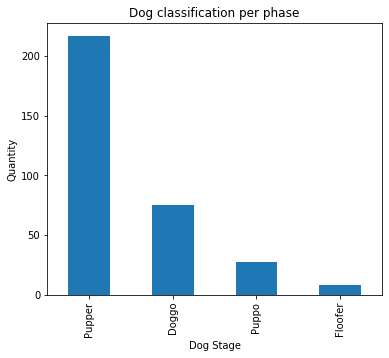

In [63]:
# copy the dataset and assign a new name to a dataset
Compare_phase = df.copy()
# Working on the new dataset to remove undifined dog's stage
Compare_phase.drop(Compare_phase[(Compare_phase['phase'] == 'undefined')].index, inplace=True)
# counting values for each stage and plotting
plt.figure(figsize=(6,5))
Compare_phase.phase.value_counts().plot(kind='bar' )
plt.xlabel("Dog Stage")
plt.ylabel("Quantity")
plt.title('Dog classification per phase')
plt.savefig('Dog classification.png')

#### Top five images given by the first prediction

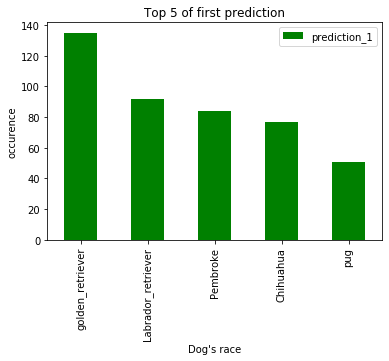

In [65]:
df.prediction_1.value_counts().head(5).plot(kind='bar', color='green')
plt.title("Top 5 of first prediction")
plt.xlabel("Dog's race")
plt.ylabel("occurence")
plt.legend()
plt.savefig('Top 5 of P1.png')

#### is the P1 prediction accurate as compare to P2?

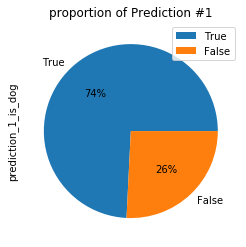

<Figure size 432x288 with 0 Axes>

In [66]:
    df.prediction_1_is_dog.value_counts().plot(kind='pie', autopct='%2.f%%')
    plt.title('proportion of Prediction #1')
    plt.legend()
    plt.show()
    plt.savefig('P1 Proportion.png')

74% of first prediction show that the Dog is a Labrador .

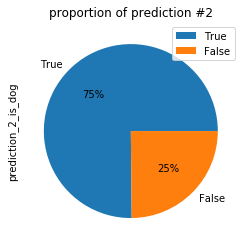

<Figure size 432x288 with 0 Axes>

In [67]:
df.prediction_2_is_dog.value_counts().plot(kind='pie', autopct='%2.f%%')
plt.title('proportion of prediction #2')
plt.legend()
plt.show()
plt.savefig('P2 Proportion.png')

75% of second prediction show that it is a breeded dog.

##### Let's compare the confidence of predictions

In [68]:
df.prediction_confidence_1.describe()

count    1896.000000
mean        0.594885
std         0.273147
min         0.044333
25%         0.360137
50%         0.588030
75%         0.850559
max         1.000000
Name: prediction_confidence_1, dtype: float64

In [69]:
df.prediction_confidence_2.describe()

count    1.896000e+03
mean     1.337713e-01
std      1.005117e-01
min      1.011300e-08
25%      5.378615e-02
50%      1.167160e-01
75%      1.940848e-01
max      4.880140e-01
Name: prediction_confidence_2, dtype: float64

In [70]:
df.prediction_confidence_3.describe()

count    1.896000e+03
mean     6.007494e-02
std      5.097523e-02
min      1.740170e-10
25%      1.587760e-02
50%      4.906315e-02
75%      9.198323e-02
max      2.734190e-01
Name: prediction_confidence_3, dtype: float64

the result of the first prediction is more confident than the second and third prediction